# Linear Regression

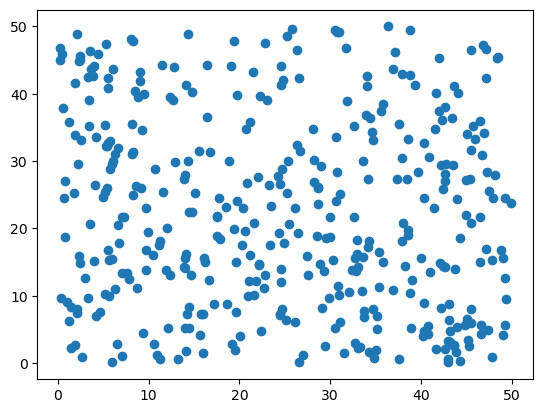

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# GENERO DATI
np.random.seed(76)
n = 400

x1 = np.random.rand(n) * 50
x2 = np.random.rand(n) * 50

plt.scatter(x1, x2)

In [ ]:
# Funzioni utili

def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def compute_beta_lin_reg(X, y): # ---> OLS
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # colonna di 1 per l'intercetta
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta, X

def r_squared(y, y_pred):
    SS_res = np.sum((y - y_pred) ** 2)
    SS_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (SS_res / SS_tot)

def augment_feature(x, degree): 
    X = np.vstack([x ** i for i in range(1, degree+1)]).T
    return X

In [ ]:
# Funzioni utili 

def compute_beta_ridge(X, y, lambda_):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    I_tilde = np.eye(X.shape[1])
    I_tilde[0, 0] = 0
    beta = np.linalg.inv(X.T @ X + lambda_ * I_tilde) @ X.T @ y
    return beta

In [126]:
np.random.seed(0)
n = 300 # number of data points
# multiply by 50 to make the features range from 0 to 50, as an example
x1 = np.random.rand(n) * 50
x2 = np.random.rand(n) * 50

# This is the true function we want to estimate
m1 = 1.5
m2 = -1
b = 50
y = m1 * x1 + m2 * x2 + b # y generale

X_matrix = np.random.rand(n, 2) * 50 # equivale a x1 e x2 sottoforma di matrice


In [127]:
M = np.array([m1, m2]) # true model coefficients

# y = 1.5 * x1 - 1.0 * x2 + 50 + rumore
y = X_matrix @ M + b + np.random.uniform(-5, 5, size=n) # recalculates y using matrix multiplication (@). It's an equivalent way of expressing the linear equation in a more compact form.

In [128]:
beta, X_matrix = compute_beta_lin_reg(X_matrix, y)

M_model = beta[1:] # tutti i coefficienti di beta tranne il primo
b_model = beta[0]

# Print the coefficients
print(f"M_model = {M_model}")
print(f"b_model = {b_model}")

print("\nWhile the true coefficients are:")
print(f"M = {M}")
print(f"b = {b}")


M_model = [ 1.50659759 -1.00700258]
b_model = 50.22133210193975

While the true coefficients are:
M = [ 1.5 -1. ]
b = 50


In [129]:
# predizioni
y_pred = X_matrix @ beta # lo sappiamo

print(f"MSE: {mse(y, y_pred):.4f}")
print(f"R^2: {r_squared(y, y_pred):.4f}")

MSE: 9.0431
R^2: 0.9867


# Feature augmentation

In [130]:
import pandas as pd

np.random.seed(0)
x = np.random.rand(n)
y = 3 * x ** 2 -2 * x + 1 + np.random.normal(0, 0.1, n) #non è lineare, ma possiamo comunque provare a fittare un modello lineare

# Create a DataFrame just to plot the data
df = pd.DataFrame({"x": x, "y": y})
df

,x,y
0,0.548814,0.821612
1,0.715189,1.127327
2,0.602763,0.824713
3,0.544883,0.777135
4,0.423655,0.548734
...,...,...
295,0.224317,0.611012
296,0.097844,0.664910
297,0.862192,1.416842
298,0.972919,1.918090


<Axes: xlabel='x', ylabel='y'>

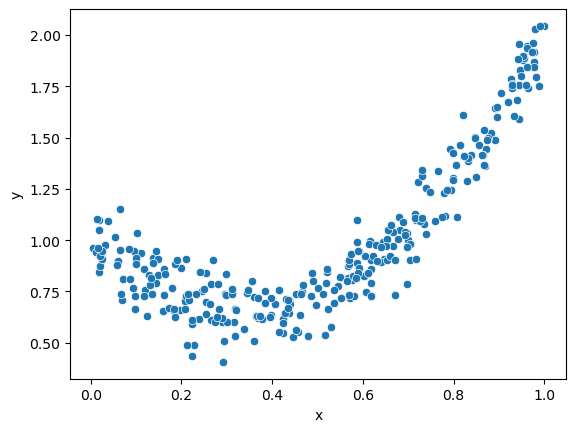

In [131]:
sns.scatterplot(data=df, x="x", y="y")

(300, 2)


<Axes: xlabel='x', ylabel='y'>

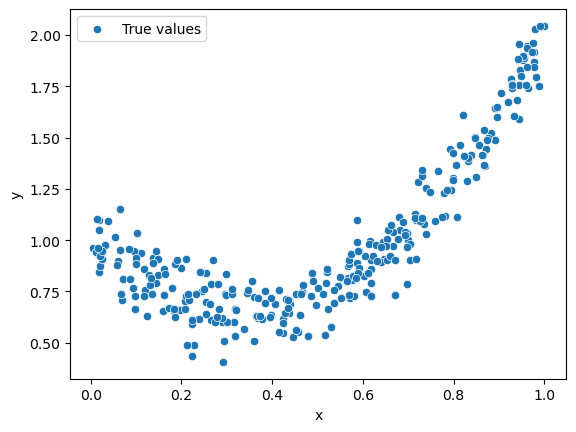

In [132]:
# First, create an array which is the square of the input variable.
x_2 = x ** 2

# And then stack the two arrays together, to create the X matrix, where each row is [x^2, x]
X = np.vstack((x_2, x)).T

# Then we can use our usual function to compute the linear regression coefficients
beta = compute_beta_lin_reg(X, y)
print(X.shape)

# And compute the predictions as the X matrix multiplied by the coefficients plus the intercept
y_pred = X.T @ beta[1:] + beta[0]

sns.scatterplot(data=df, x="x", y="y", label="True values")


In [ ]:
x_min, x_max = np.min(x), np.max(x)
x_grid = np.linspace(x_min, x_max,  0)

# Compute the y values using the model
y_model = beta[0] + beta[1] * x_grid ** 2 + beta[2] * x_grid

# And plot the model
plt.plot(x_grid, y_model, "r", label="Model")
plt.legend()

ValueError: operands could not be broadcast together with shapes (300,3) (100,) 